<a href="https://colab.research.google.com/github/Justin-Jonany/FLARE_Implementation/blob/main/notebooks_and_demonstration/0_Questions_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions Construction
The goal of this notebook is to construct questions from "The Richest Man in Babylon" that will be used to implement FLARE

# Libraries

In [ ]:
!git clone https://github.com/Justin-Jonany/FLARE_Implementation.git

Cloning into 'FLARE_Implementation'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (238/238), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 238 (delta 123), reused 177 (delta 72), pack-reused 0 (from 0)
Receiving objects: 100% (238/238), 6.76 MiB | 18.82 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [ ]:
pip install -r FLARE_Implementation/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28

In [ ]:
pip install openai langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00


In [ ]:
import os
from os import listdir
from os.path import isfile, join
from random import sample
import pandas as pd
import matplotlib.pyplot as plt
from openai import OpenAI
from IPython.display import Markdown
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

# Data

In [ ]:
data_path = 'FLARE_Implementation/rmib_dataset'
onlyfiles = [f for f in listdir(data_path) if isfile(join(data_path, f))]
onlyfiles

['9_the_sixth_cure.txt',
 '14_the_walls_of_babylon.txt',
 'rmib_metadata.csv',
 '6_the_third_cure.txt',
 'table_of_contents.txt',
 'about_the_author.txt',
 'foreword.txt',
 '7_the_fourth_cure.txt',
 '10_the_seventh_cure.txt',
 '5_the_second_cure.txt',
 '12_the_five_laws_of_gold_full.txt',
 '16_the_clay_tablets_from_babylon.txt',
 '8_the_fifth_cure.txt',
 '0_a_historical_sketch_of_babylon.txt',
 '17_the_luckiest_man_in_babylon.txt',
 '4_the_first_cure.txt',
 '2_the_richest_man_in_babylon.txt',
 '15_the_camel_trader_of_babylon.txt',
 '1_the_man_who_desired_gold.txt',
 '3_seven_cures_for_a_lean_purse.txt',
 'full_richest_man_in_babylon.txt',
 '13_the_gold_lender_of_babylon.txt',
 '11_meet_the_goddess_of_good_luck.txt']

In [ ]:
text_data = {}
for file_name in onlyfiles:
  with open(data_path + '/' + file_name, 'r') as f:
    text_data[file_name] = f.read()

In [ ]:
text_info = {}
for filename, text in text_data.items():
  if filename == 'full_richest_man_in_babylon.txt':
    text_type = 'full text'
    title = 'The Richest Man in Babylon'
  elif filename == 'foreword.txt':
    text_type = 'foreword'
    title = 'foreword'
  elif filename == 'table_of_contents.txt':
    text_type = 'table of contets'
    title = 'table of contents'
  elif filename == 'about_the_author.txt':
    text_type = 'about the author'
    title = 'about the author'
  else:
    text_type = 'chapter'
    title = ' '.join(''.join([i for i in filename[:-4] if not i.isdigit()]).split('_')[1:])
  text_info[filename] = [len(text), len(text.split(' ')), len(text.splitlines()), title, text_type, text_data[filename]]
df_metadata = pd.DataFrame(text_info).T.rename(columns={0:'chars', 1:'words', 2:'lines', 3:'title', 4:'type', 5:'text'})
df_metadata

,chars,words,lines,title,type,text
9_the_sixth_cure.txt,3887,721,63,the sixth cure,chapter,"THE SIXTH CURE \nInsure a future income \n\n""T..."
14_the_walls_of_babylon.txt,6696,1177,118,the walls of babylon,chapter,"The Walls of Babylon \n\nOld Banzar, grim warr..."
rmib_metadata.csv,459790,83596,8311,metadata,chapter,",chars,words,lines,title,type,text\n9_the_sixt..."
6_the_third_cure.txt,3728,665,60,the third cure,chapter,"THE THIRD CURE \nMake thy gold multiply \n\n""B..."
table_of_contents.txt,1046,201,77,table of contents,table of contets,Table of Contents \n\nAbout the author 3 \n\nF...
about_the_author.txt,830,134,14,about the author,about the author,About the author \n\nGEORGE SAMUEL CLASON was ...
foreword.txt,1890,306,29,foreword,foreword,Foreword \n\nOur prosperity as a nation depend...
7_the_fourth_cure.txt,2675,471,42,the fourth cure,chapter,THE FOURTH CURE \nGuard thy treasures from los...
10_the_seventh_cure.txt,5006,916,96,the seventh cure,chapter,THE SEVENTH CURE \nIncrease thy ability to ear...
5_the_second_cure.txt,3901,694,74,the second cure,chapter,THE SECOND CURE \nControl thy expenditures \n\...


In [ ]:
df_metadata.to_csv('rmib_metadata.csv', index=False)

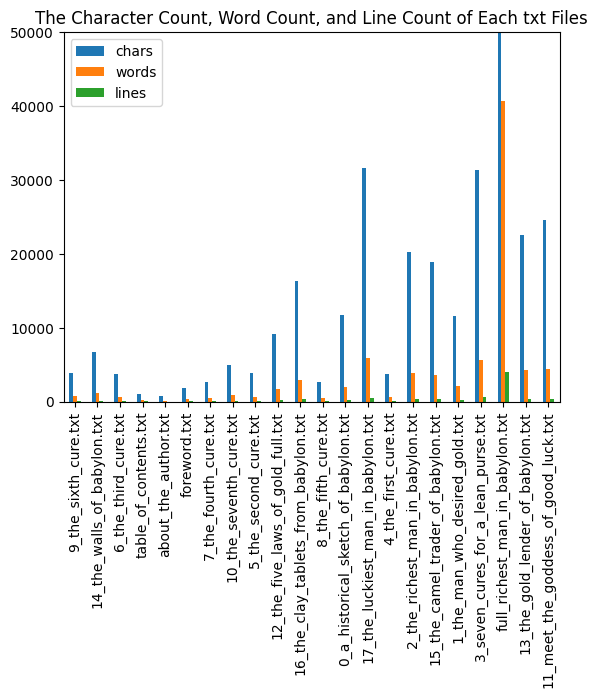

In [ ]:
df_metadata.plot(kind='bar')
plt.ylim(0, 50000)
plt.title('The Character Count, Word Count, and Line Count of Each txt Files')
plt.show()

# Question Construction
To create effective questions from the full text, I'm going to ask the llm to make questions per chapter.

Luckily, the book's chapters are independent to each other, meaning I don't need to recursively put preceeding chapter's summary/questions/info for each querying.

In [ ]:
context = df_metadata.loc['0_a_historical_sketch_of_babylon.txt']['text']
client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
        {"role": "system", "content": f"""You are question maker that makes questions from this passage: {context}"""},
        {"role": "user", "content": f"""From the passage, give me 6 questions of varying difficulty:
        2 questions for Easy: (Who, When, Where)
        2 questions for Medium: (What)
        2 questions for Hard: (Why, How)

        Use the following format:
        {{
          'easy': [easy_question1, easy_question2],
          'medium': [medium_question1, medium_question2],
          'hard': [hard_question1, hard_question2],
          'index': [0, 1],
          'chapter': ['{df_metadata.loc[i]['title']}', '{df_metadata.loc[i]['title']}']
        }}

        it's critical to not output any other words, other than the dictionary itself.
        """}
  ]
)

In [ ]:
display(Markdown(response.choices[0].message.content))

{
  'easy': [
    'Who were the outstanding rulers of Babylon?',
    'Where was Babylon located?'
  ],
  'medium': [
    'What were the two natural resources possessed by Babylon?',
    'What methods did Babylonian engineers use for irrigation?'
  ],
  'hard': [
    'Why is Babylon considered an outstanding example of man\'s ability to achieve great objectives?',
    'How did archaeologists determine the age of the civilization of Babylon?'
  ],
  'index': [0, 1, 0, 1],
  'chapter': ['table of contents', 'table of contents']
}

In [ ]:
client = OpenAI()
question_dataframe = []
for i in df_metadata.index:
  if df_metadata.loc[i]['type'] == 'chapter':
    context = df_metadata.loc[i]['text']
    response = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
          {"role": "system", "content": f"""You are question maker that makes questions from this passage: {context}"""},
          {"role": "user", "content": f"""From the passage, give me 6 questions of varying difficulty:
          2 questions for Easy: (Who, When, Where)
          2 questions for Medium: (What)
          2 questions for Hard: (Why, How)

          Use the following format:
          {{
            'easy': [easy_question1, easy_question2],
            'medium': [medium_question1, medium_question2],
            'hard': [hard_question1, hard_question2],
            'index': [0, 1],
            'chapter': ['{df_metadata.loc[i]['title']}', '{df_metadata.loc[i]['title']}']
          }}

          it's critical to not output any other words, other than the dictionary itself.
          """}
        ]
    )
    question_dataframe.append(pd.DataFrame(eval(response.choices[0].message.content)))

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
full_question_df = pd.concat(question_dataframe).set_index(['chapter', 'index'])
full_question_df

easy  \
chapter                        index                                                                                          
a historical sketch of babylon 0        Who were the outstanding rulers of Babylon recognized for their wisdom and justice?   
                               1                                                                 Where was Babylon located?   
the man who desired gold       0                                                                             Who is Bansir?   
                               1                                                     Where does Bansir sit and contemplate?   
the richest man in babylon     0                                                        Who was the richest man in Babylon?   
                               1                                                                      Where did Arkad live?   
seven cures for a lean purse   0                                                         Who is the richest man in Babylon?   
                               1                                                    When did King Sargon return to Babylon?   
the first cure                 0                                        Who addressed the thoughtful man in the second row?   
                               1                                    Where did Arkad speak to the men about building wealth?   
the second cure                0                                          Who addressed his students about the second cure?   
                               1                                                       When did Arkad address his students?   
the third cure                 0                                                                              Who is Arkad?   
                               1                                                         When did Arkad speak to his class?   
the fourth cure                0                                                Who spoke upon the fourth day to his class?   
                               1                                   When did Arkad speak about guarding treasures from loss?   
the fifth cure                 0                                         Who is speaking to the class about the fifth cure?   
                               1                                                    Where does Arkad say a man should live?   
the sixth cure                 0                                                Who addressed his class upon the sixth day?   
                               1                                  When should a man make preparation for a suitable income?   
the seventh cure               0                                                        Who did Arkad address in his class?   
                               1                                     When did Arkad deliver his speech on the seventh cure?   
meet the goddess of good luck  0                                                        Who was the richest man in Babylon?   
                               1                                          When did Arkad stroll to his accustomed platform?   
the five laws of gold full     0                                         Who is the richest man that ever lived in Babylon?   
                               1                                             When did Nomasir return to his father's house?   
the gold lender of babylon     0                                                      Who is the lender of gold in Babylon?   
                               1                                           When did Rodan receive the fifty pieces of gold?   
the walls of babylon           0      Who stood guard at the passageway leading to the top of the ancient walls of Babylon?   
                               1                                    Where did the attack on the walls of Babylon come from?   
the camel trader of babylon    0                       

In [ ]:
full_question_df.to_csv('questions.csv')

In [ ]:
df = pd.read_csv('questions.csv', index_col=['chapter', 'index'])


In [ ]:
df

easy  \
chapter                        index                                                                                          
a historical sketch of babylon 0        Who were the outstanding rulers of Babylon recognized for their wisdom and justice?   
                               1                                                                 Where was Babylon located?   
the man who desired gold       0                                                                             Who is Bansir?   
                               1                                                     Where does Bansir sit and contemplate?   
the richest man in babylon     0                                                        Who was the richest man in Babylon?   
                               1                                                                      Where did Arkad live?   
seven cures for a lean purse   0                                                         Who is the richest man in Babylon?   
                               1                                                    When did King Sargon return to Babylon?   
the first cure                 0                                        Who addressed the thoughtful man in the second row?   
                               1                                    Where did Arkad speak to the men about building wealth?   
the second cure                0                                          Who addressed his students about the second cure?   
                               1                                                       When did Arkad address his students?   
the third cure                 0                                                                              Who is Arkad?   
                               1                                                         When did Arkad speak to his class?   
the fourth cure                0                                                Who spoke upon the fourth day to his class?   
                               1                                   When did Arkad speak about guarding treasures from loss?   
the fifth cure                 0                                         Who is speaking to the class about the fifth cure?   
                               1                                                    Where does Arkad say a man should live?   
the sixth cure                 0                                                Who addressed his class upon the sixth day?   
                               1                                  When should a man make preparation for a suitable income?   
the seventh cure               0                                                        Who did Arkad address in his class?   
                               1                                     When did Arkad deliver his speech on the seventh cure?   
meet the goddess of good luck  0                                                        Who was the richest man in Babylon?   
                               1                                          When did Arkad stroll to his accustomed platform?   
the five laws of gold full     0                                         Who is the richest man that ever lived in Babylon?   
                               1                                             When did Nomasir return to his father's house?   
the gold lender of babylon     0                                                      Who is the lender of gold in Babylon?   
                               1                                           When did Rodan receive the fifty pieces of gold?   
the walls of babylon           0      Who stood guard at the passageway leading to the top of the ancient walls of Babylon?   
                               1                                    Where did the attack on the walls of Babylon come from?   
the camel trader of babylon    0                       